# Demo
A quick tutorial on how to use. Be sure to unzip the example data files first!

In [38]:
%matplotlib inline
# import the package
import sys
sys.path.append("../")
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from hbond import analysis, compare

1. Create a list of hydrogen bond donors, acceptors, and their occupancies (% of frames in the simulation that the hydrogen bond is present) using the hbond_df() function.

For this, you will need an .ndx and .xpm file from the output of gmx_hbond as well as a .gro file from the simulation.

For reference, here is my usual gmx_hbond command:

gmx_mpi hbond -f traj.xtc -s md_long.tpr -num hbonds.xvg -hbm hbmap.xpm -hbn hbond.ndx

In [2]:
# The data used here are from some simulations of the SARS-CoV-2 main protease.
# This cell will show all the intraprotein hydrogen bonds present with at least 10% ocupancy
# throughout the simulation.

# File paths
ndx = './example_data/mpro/hbond_h2o.ndx'
gro = './example_data/mpro/protein.gro'
xpm = './example_data/mpro/hbmap_h2o.xpm'

# Compute hydrogen bonds
df = analysis.hbond_df(ndx, gro, xpm, cutoff=10)
df

,Donor,Acceptor,Occupancy (%)
0,ARG346 NH2@HH21,ASP493 OD2,99.92
1,PHE456 N@H,SER419 O,99.75
2,PHE150 N@H,SER113 O,99.67
3,ARG437 N@H,THR441 O,99.65
4,GLY146 N@H,HIS163 E O,99.61
...,...,...,...
788,ASP354 N@H,GLU353 OE1,10.46
789,ASN357 ND2@HD21,ASP354 O,10.37
790,TYR126 OH@HH,LYS137 O,10.22
791,THR198 OG1@HG1,ASN238 OD1,10.14


2. Create a hydrogen bond map showing how frequently residues in the protein are hydrogen-bonded to each other during the simulation

In [31]:
# The data used here are from some MD simulations of the SUR2 NBD1 protein.

# Files
ndx = './example_data/sur/hbond_hsur2a.ndx'
gro = './example_data/sur/protein_hsur2a.gro'
xpm = './example_data/sur/hbmap_hsur2a.xpm'

# Compute the hydrogen bond map
hbmap = analysis.hbond_map(ndx, gro, xpm)

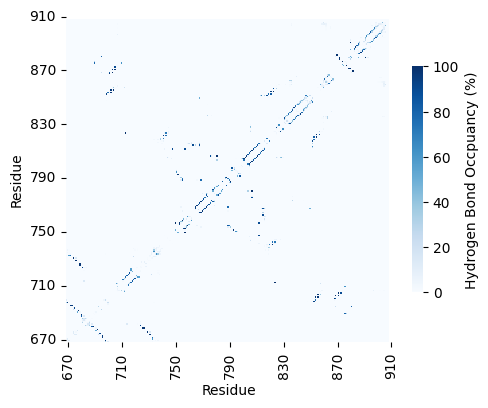

In [49]:
# Plot the data
fig, ax = plt.subplots(figsize=(5, 5))

sns.heatmap(hbmap[0], cmap='Blues', square=True, linewidths=0,
            cbar_kws={"shrink": 0.5}, vmin=0, vmax=100)

ax.set_xlabel('Residue')
ax.set_ylabel('Residue')

ax.set_xticks(np.arange(2, 252, 40))
ax.set_yticks(np.arange(2, 252, 40))
ax.set_xticklabels(np.arange(670, 920, 40))
ax.set_yticklabels(np.arange(670, 920, 40))

cbar = ax.collections[0].colorbar
cbar.set_label('Hydrogen Bond Occpuancy (%)', rotation=90)

ax.invert_yaxis()
fig.tight_layout()

3. Compare the hydrogen bonds across multiple simulations (same structure)

In [50]:
# The data used here will be from simulations of the SARS-CoV-2 main protease. One set
# of files will be from simulations in H2O, the other set will be from simulations in D2O.
# This lets us see if there is any difference in hydrogen bonds in different solvents.

# File paths
ndx = ['./example_data/mpro/hbond_h2o.ndx', './example_data/mpro/hbond_d2o.ndx'] # Make sure the order is consistent
gro = './example_data/mpro/protein.gro' # same gro file for both simulations, only difference is the solvent
xpm = ['./example_data/mpro/hbmap_h2o.xpm', './example_data/mpro/hbmap_d2o.xpm']

# Compute hydrogen bonds in both systems
df = compare.compare_hbonds(ndx, gro, xpm, cutoff=10)
df # File 1 Occ is H2O, File 2 Occ is D2O

,Donor,Acceptor,File 1 Occ (%),File 2 Occ (%)
0,ARG346 NH2@HH21,ASP493 OD2,99.92,87.40
1,PHE456 N@H,SER419 O,99.75,99.63
2,PHE150 N@H,SER113 O,99.67,99.33
3,ARG437 N@H,THR441 O,99.65,92.60
4,GLY146 N@H,HIS163 E O,99.61,97.30
...,...,...,...,...
996,ARG4 NH1@HH11,GLU596 OE2,0.00,28.84
997,ARG494 NH2@HH21,ASP493 OD1,0.00,19.75
998,GLN495 N@H,GLN495 OE1,0.00,16.02
999,ASN334 ND2@HD21,GLY452 O,0.00,52.22


In [ ]:
# the dataframe is sorted based on the occupancy of the first simulation.

4. Compare hydrogen bonds across multiple systems (different structures)

In [51]:
# The data used here will be from simulations of the SUR2 NBD1. We have one variant of the
# protein that is "whole" (hsur2a) and one variant where we excise a ~20 residue long
# segment in the middle of the protein (hsur2d). the structures are different, so we have to use
# multiple .gro files. The atom numbers in the .gro files can be different, but the residue
# numbers should be consistent between systems. The function used here will match up
# hydrogen bonds between the systems based on the donor and acceptor strings.

# File paths
ndx = ['./example_data/sur/hbond_hsur2a.ndx', './example_data/sur/hbond_hsur2d.ndx'] # Make sure the order is consistent
gro = ['./example_data/sur/protein_hsur2a.gro', './example_data/sur/protein_hsur2d.gro']
xpm = ['./example_data/sur/hbmap_hsur2a.xpm', './example_data/sur/hbmap_hsur2d.xpm']

# Compute the hydrogen bond dataframes for each system individually
dfs = [analysis.hbond_df(ndx[0], gro[0], xpm[0], cutoff=10), # hsur2a
       analysis.hbond_df(ndx[1], gro[1], xpm[1], cutoff=10)] # hsur2d

# Compute hydrogen bonds in both systems
df = compare.compare_hbonds_multiple_diff_structures(dfs)
df # File 1 Occ is hsur2a, File 2 Occ is hsur2d

,Donor/Acceptor,File 1 Occ (%),File 2 Occ (%)
0,LYS886 N@H SER889 O,99.47,99.48
1,THR803 OG1@HG1 GLY800 O,99.19,99.24
2,SER712 OG@HG ASP836 OD2,98.42,89.40
3,LEU856 N@H MET851 O,98.08,78.08
4,PHE834 N@H ALA753 O,97.99,95.51
...,...,...,...
417,THR697 OG1@HG1 ASP669 O,0.00,22.60
418,ASN915 N@H LYS911 O,0.00,22.26
419,ARG892 NH1@HH11 ASP903 OD1,0.00,22.04
420,ARG892 NH1@HH11 ASP903 OD2,0.00,20.90


In [ ]:
# This function works on as many systems as you want! Not just limited to 2.